<a href="https://colab.research.google.com/github/Mvgrillo1357/Ai-Platform-Engineering/blob/master/michael_grillo_personalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personal Project

In [3]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install kaggle

In [0]:
!mkdir .kaggle
!mkdir ~/.kaggle

In [0]:
import json
token = {"username":"michaelgrillo","key":"1b1b61b21b7bd669c2b170bf718b9cd8"}
with open ('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [8]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [9]:
!kaggle datasets download -d sobhanmoosavi/us-accidents -p /content --force

 92% 182M/199M [00:09<00:00, 19.0MB/s]
100% 199M/199M [00:09<00:00, 21.1MB/s]


In [10]:
!unzip \*.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec19.csv  


In [11]:
!ls

sample_data  US_Accidents_Dec19.csv  us-accidents.zip


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import scipy as sp
!pip install geopandas
import sklearn as skl
import geopandas as gpd
import geopy
import folium
from shapely.geometry import Point, Polygon
from sklearn.cluster import KMeans ,AgglomerativeClustering


     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 11.8MB 132kB/s 
     |████████████████████████████████| 10.1MB 47.3MB/s 


In [0]:
import io
df_traffic = pd.read_csv('US_Accidents_Dec19.csv')


For my personal individual project I would like to use machine learning in order to find trends over an extensive dataset which documents all traffic violations in 49 states of the United States collected from February 2016 to December 2019. The data set used was gathered from https://www.kaggle.com/sobhanmoosavi/us-accidents. By deploying a machine learning model that can predict trends and categorize variables I will be able be able to make predictive geographic clustering.

https://smoosavi.org/datasets/us_accidents
    this link defines the various variables of the dataset. This dataset is a live document but I used the data that lasted from February 2016 to December 2019.

In [14]:
df_traffic.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [15]:
df_traffic.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.246264e+06,2.974335e+06,2.974335e+06,2.974335e+06,728071.000000,728071.000000,2.974335e+06,1.056730e+06,2.918272e+06,1.121712e+06,2.915162e+06,2.926193e+06,2.908644e+06,2.533495e+06,975977.000000
mean,2.078316e+02,2.360190e+00,3.649361e+01,-9.542625e+01,37.580871,-99.976032,2.855654e-01,5.837004e+03,6.235120e+01,5.132685e+01,6.540542e+01,2.983190e+01,9.150770e+00,8.298064e+00,0.020495
std,2.032959e+01,5.414733e-01,4.918849e+00,1.721881e+01,5.004757,18.416647,1.548392e+00,1.515928e+04,1.878855e+01,2.519127e+01,2.255676e+01,7.213808e-01,2.892114e+00,5.138546e+00,0.235770
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,24.570110,-124.497829,0.000000e+00,0.000000e+00,-7.780000e+01,-6.590000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.010000e+02,2.000000e+00,3.355040e+01,-1.172920e+02,33.957554,-118.286610,0.000000e+00,8.370000e+02,5.000000e+01,3.200000e+01,4.900000e+01,2.982000e+01,1.000000e+01,4.600000e+00,0.000000
50%,2.010000e+02,2.000000e+00,3.584969e+01,-9.025083e+01,37.903670,-96.631690,0.000000e+00,2.717000e+03,6.440000e+01,5.400000e+01,6.700000e+01,2.998000e+01,1.000000e+01,7.000000e+00,0.000000
75%,2.010000e+02,3.000000e+00,4.037026e+01,-8.091891e+01,41.372630,-82.323850,1.000000e-02,7.000000e+03,7.600000e+01,7.300000e+01,8.400000e+01,3.011000e+01,1.000000e+01,1.040000e+01,0.000000
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,49.075000,-67.109242,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02,25.000000


In [16]:
df_traffic.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

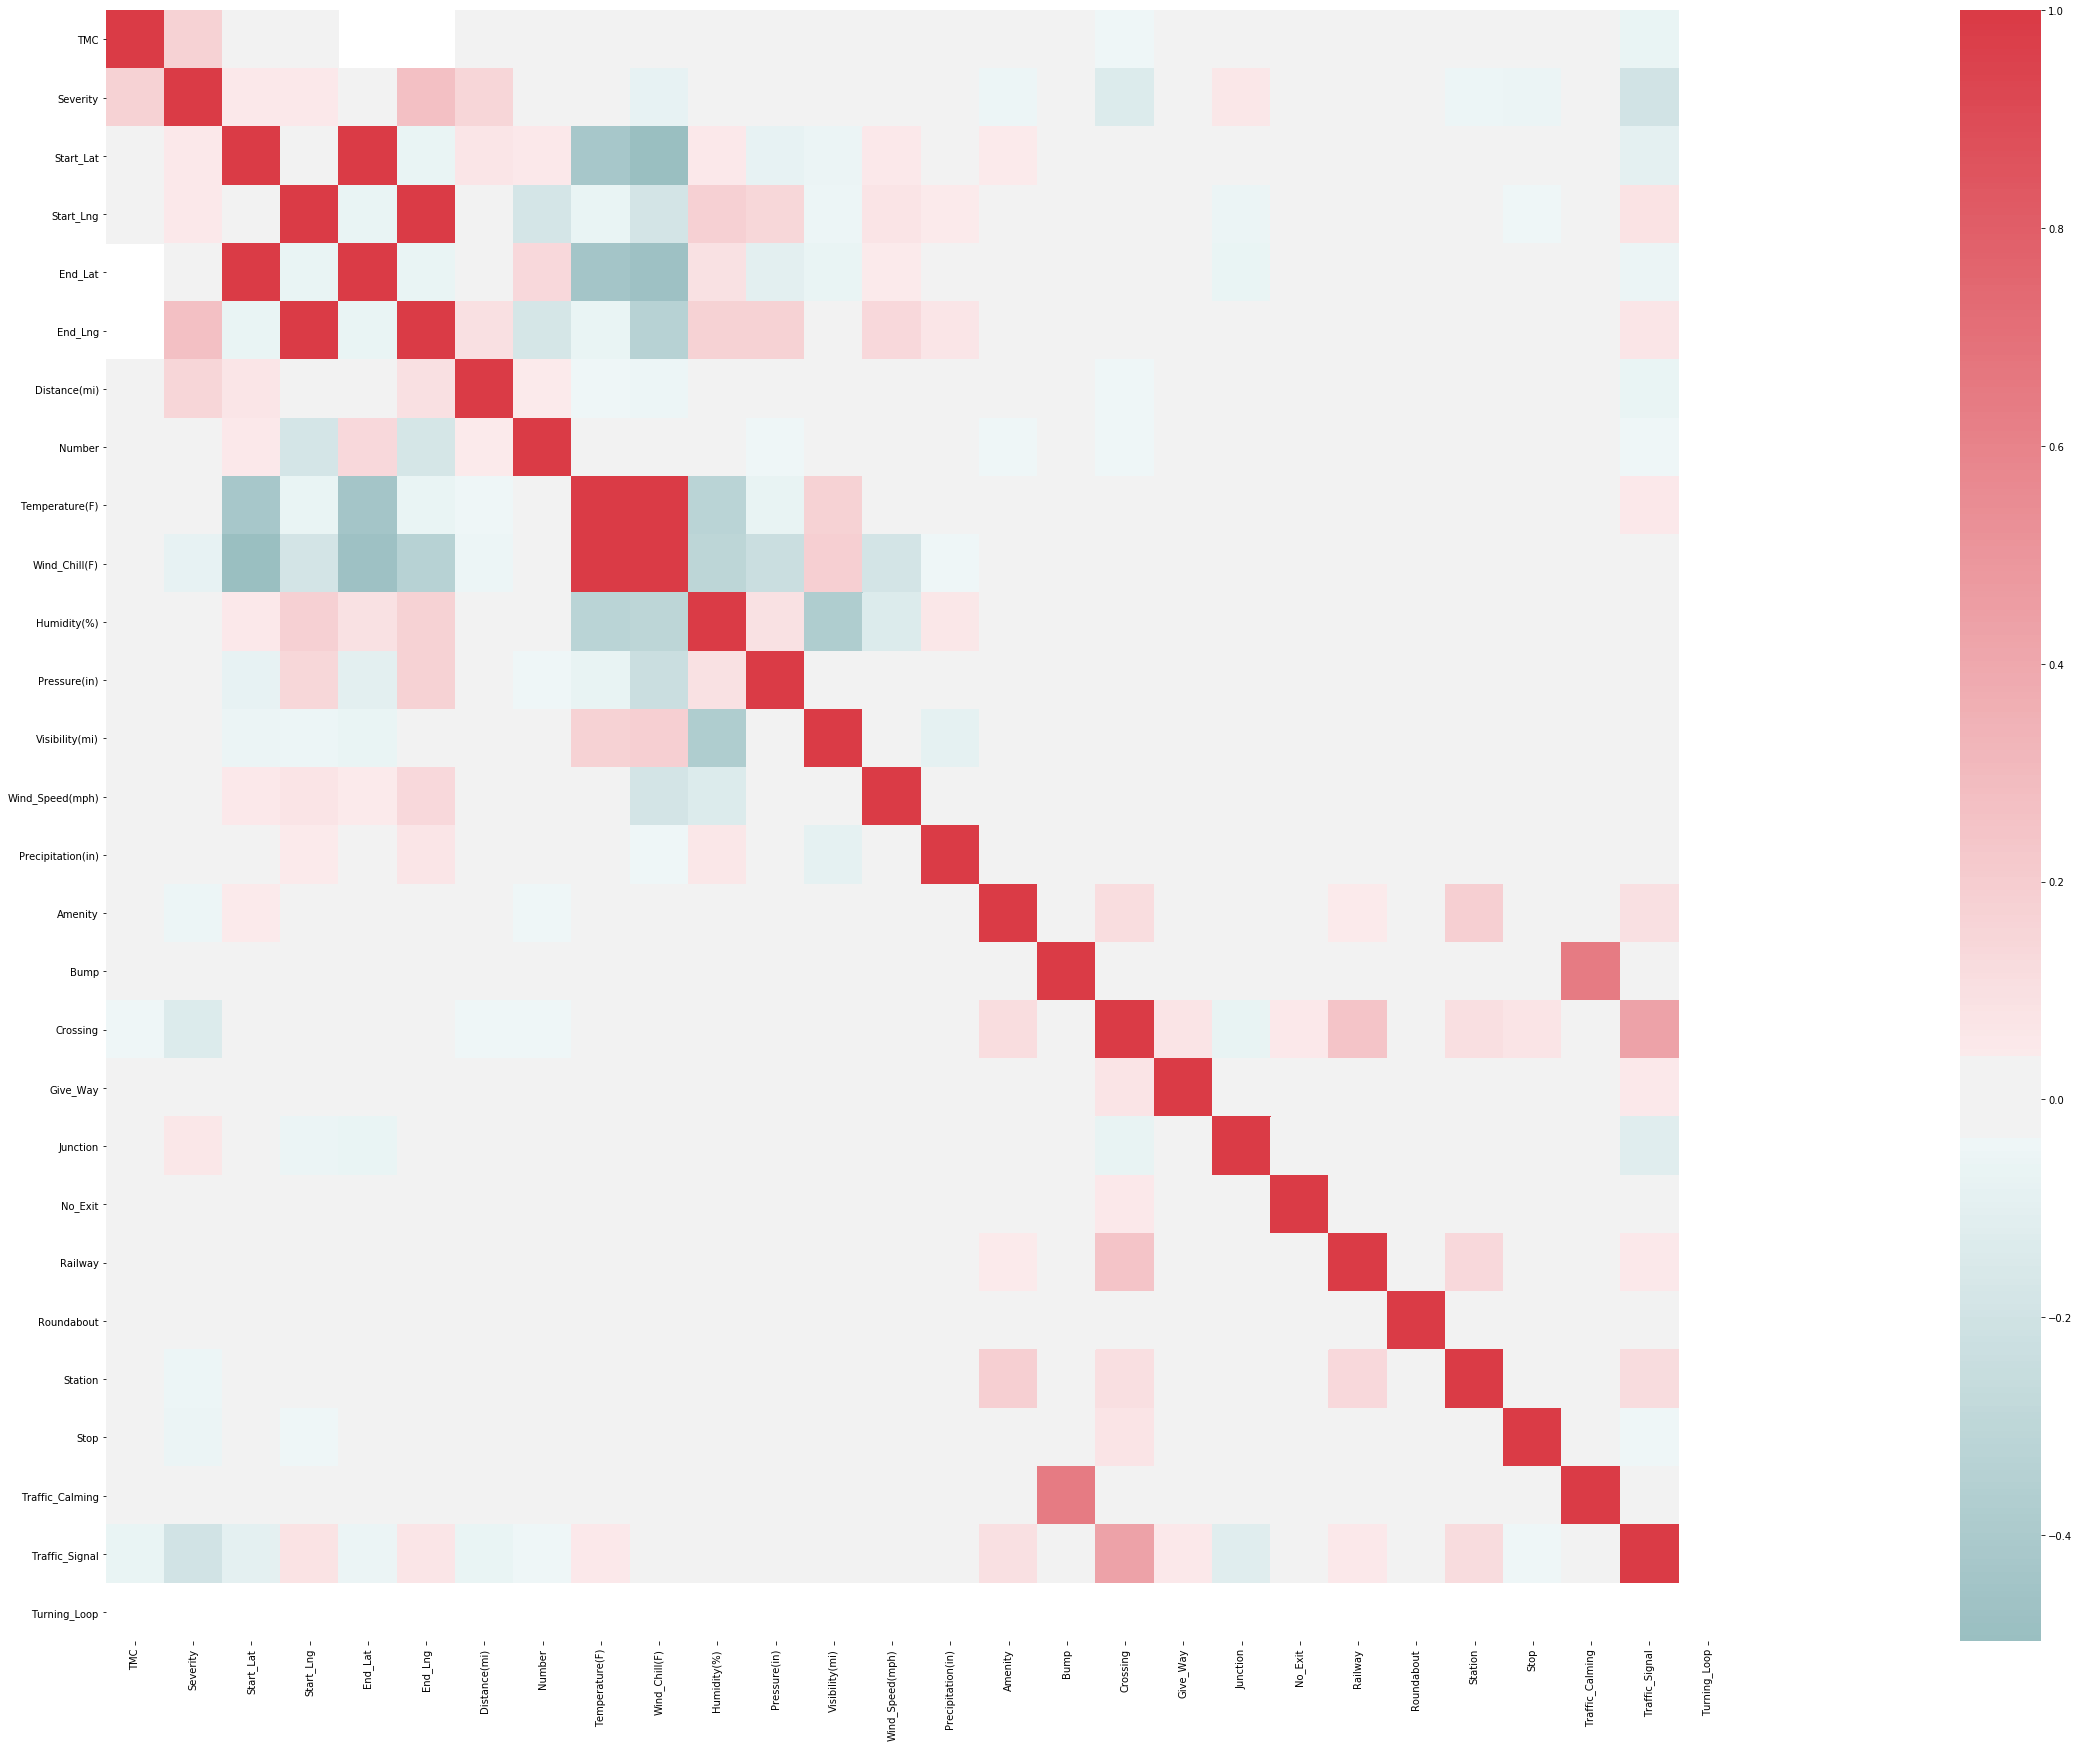

In [17]:
corr=df_traffic.corr()
cmap = sns.diverging_palette(200, 10, as_cmap=True)

size=plt.figure(figsize=(80,30))

sns.heatmap(corr, cmap=cmap, square='true', center=0)

In [18]:
print('Unique values',df_traffic.nunique())

Unique values ID                       2974335
Source                         3
TMC                           21
Severity                       4
Start_Time               2743101
End_Time                 2761499
Start_Lat                1002359
Start_Lng                 985099
End_Lat                   298605
End_Lng                   302906
Distance(mi)               12847
Description              1597506
Number                     37398
Street                    160715
Side                           3
City                       11685
County                      1713
State                         49
Zipcode                   377152
Country                        1
Timezone                       4
Airport_Code                1995
Weather_Timestamp         470781
Temperature(F)               827
Wind_Chill(F)                971
Humidity(%)                  100
Pressure(in)                 994
Visibility(mi)                81
Wind_Direction                24
Wind_Speed(mph)              

This data is only for the United States so keeping the 'Country' column is 100% redundant.

In [0]:
df_traffic.drop(['Country'], axis=1, inplace=True)

In [20]:
print(df_traffic.isnull().sum())


ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitation(in)        1998358
Weather_Co

In [21]:
print(len(df_traffic['End_Lat']))
print(len(df_traffic['End_Lng']))

2974335
2974335


In [22]:
print(len(df_traffic['End_Lat'].isnull())/(len(df_traffic['End_Lat'])))
print(len(df_traffic['End_Lng'].isnull())/(len(df_traffic['End_Lat'])))

1.0
1.0


The 'End_Lat' and 'End_Lng' are all null values so they need to be dropped.

In [0]:
df_traffic.drop(['End_Lat'], axis=1, inplace=True)
df_traffic.drop(['End_Lng'], axis=1, inplace=True)

Since the data involves over 2 million accidents it is important to target States of interest. In my case I am looking for the state with the most accidents, the state with the most category 4 accidents and the state with the highest on average (mean) severity of accidents.

In [0]:
whichstate=df_traffic.State.unique()

count_state=[]
for i in df_traffic.State.unique():
    count_state.append(df_traffic[df_traffic['State']==i].count()['ID'])


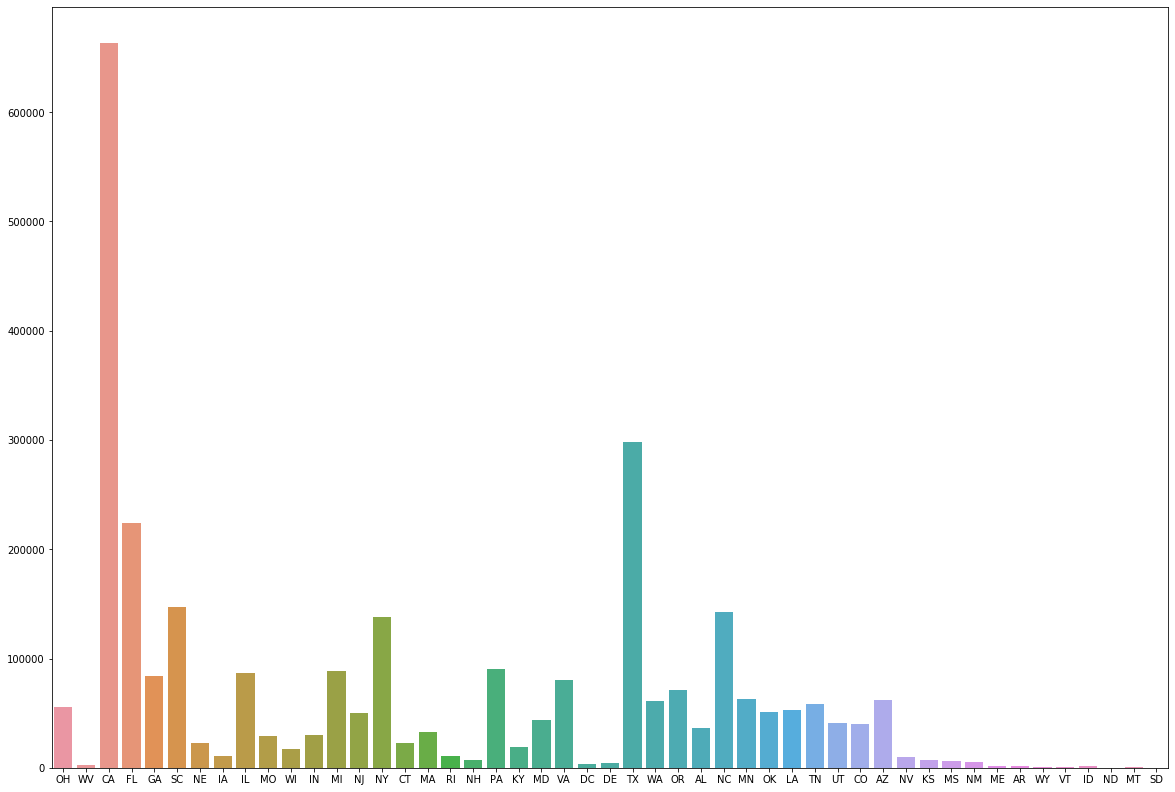

In [25]:
plt.figure(figsize=(20, 14))
sns.barplot(whichstate, count_state)

Excellent, california is definetely a state of interest. Next we will look at the mean of the severity of the accident that the individual States experience. 

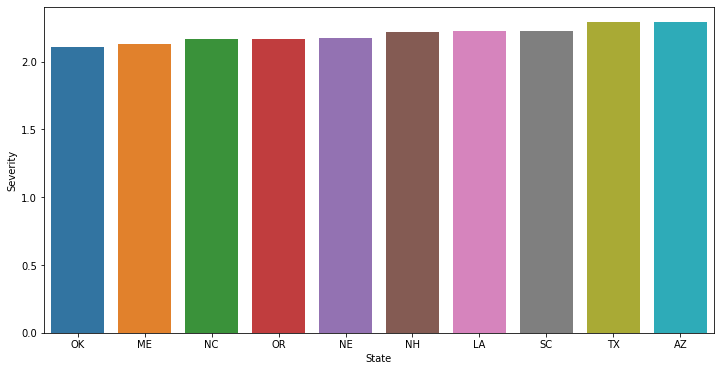

In [26]:
df_top_Severity_State = df_traffic.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()
plt.figure(figsize=(12,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State.head(10))
plt.ioff()

Arizona is definitely a state of interest. Texas is also a state of interest since Texas has a large number of accidents and yet it's mean is still in second place.

In [0]:
severity_4=[]
for i in whichstate:
    severity_4.append(df_traffic[(df_traffic['Severity']==4)&(df_traffic['State']==i)].count()['ID'])

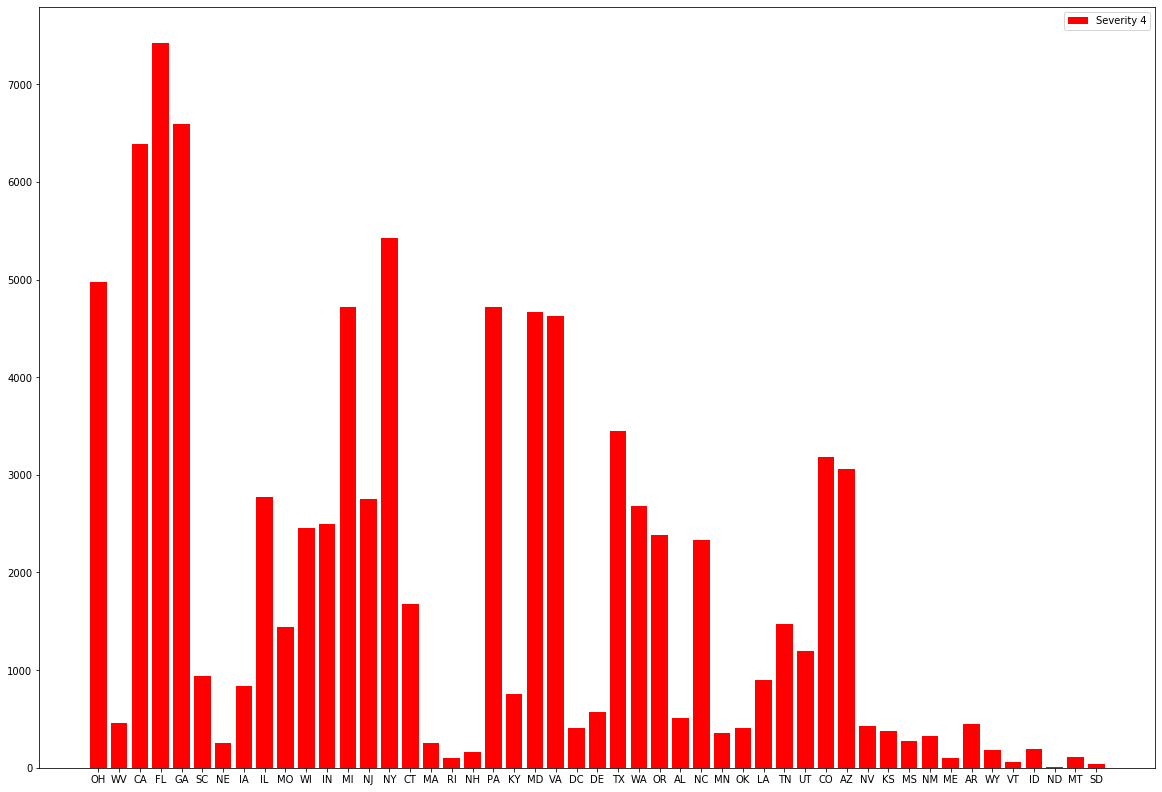

In [28]:
plt.figure(figsize=(20, 14))
plt.bar(whichstate, severity_4, label= 'Severity 4', color= 'red')
plt.legend()

From my analysis, Florida may not have the most accidents but it certainely has the most severe accidents. Of note Georgia has the second highest number of severity four accidents so therefore Georgia is also a state of interest. Let's check to see if different features are correllated with eachother.

In [29]:
df_traffic.shape

(2974335, 46)

In [0]:
"""
since we have longitude and latitude we do not need number, street, county, zipcode. State and city will be useful for finding our target states to analyze and the city variable is nice to 
map out a centroid of each city and the differences between accidents and centers of the centroids
"""
df_traffic.drop(['Number'], axis=1, inplace=True)
df_traffic.drop(['Street'], axis=1, inplace=True)
df_traffic.drop(['County'], axis=1, inplace=True)
df_traffic.drop(['Zipcode'], axis=1, inplace=True)

df_traffic.shape

In [0]:
df_traffic.columns

In [0]:
#lets check numerical correlation to see what our results are
corr=df_traffic.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

size=plt.figure(figsize=(80,30))

sns.heatmap(corr, cmap=cmap, square='true', center=0)

It looks like TMC, Start Lat, Start Lng, Distance, Wind Chill, Amenity, Crossing, Junction, Station, Stop, and Traffic Signal all have some level of correllation with Severity. 

In [0]:
bool_col= [col for col in df_traffic.columns if df_traffic[col].dtype ==np.dtype('bool')]
booldf= df_traffic[bool_col]
not_one_hot= booldf[booldf.sum(axis=1)>1]
accidentlocation=booldf.sum(axis=0)


In [0]:
accidentlocation

In [0]:
accidentlocation.plot.pie(autopct='%1.1f%%', shadow=True, figsize=(15,15))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

Now that we have examined common occurences and trends within the accident data it is time to look at the data in terms of time series.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
Datetime is useful for handling time series data

In [0]:
df_traffic['time'] = pd.to_datetime(df_traffic.Start_Time, format='%Y-%m-%d')
df_traffic = df_traffic.set_index('time')
df_traffic.head()

In [0]:
df_traffic.isnull().sum()

The good news is that there are no NaN values for Start_Time so therefore I may proceed with plotting accidents per day without imputing.

In [0]:
freq= {'D':'Daily'}
plt.subplots(1,1,figsize=(21, 7))
for i, (fr, text) in enumerate(freq.items(), 1):
    plt.subplot(1,1,i)
    sampleid=df_traffic.ID['2016':].resample(fr).count()
    sampleid.plot(style='.')
    plt.title('Accident, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

Now we can look at the geographic data by utilizing the geopandas library.

In [0]:
df_florida= df_traffic.loc[(df_traffic['State']=='FL')][['ID', 'Start_Lat', 'Start_Lng', 'Severity']]
df_florida.head()

In [0]:
df_florida.shape

In [0]:
def create_gdf(df_florida, lat, lon):
    """ Convert pandas dataframe into a Geopandas GeoDataFrame"""
    crs = {'init': 'epsg:4326'}
    geometry = [Point(xy) for xy in zip(df_florida['Start_Lng'], df_florida['Start_Lat'])]
    gdf = gpd.GeoDataFrame(df_florida, crs= crs , geometry=geometry)
    return gdf
fl_gdf =  create_gdf(df_florida, "latitude", "longitude")
fl_gdf.tail()

With a geopandas dataframe we can potentially create a centroid or cluster with K means clustering.

In [0]:
"""
map1 = folium.Map(
    location=[27.6648, -81.5158],
    tiles='cartodbpositron',
    zoom_start=8,
)
fl_gdf.apply(lambda row:folium.CircleMarker(location=[row["Start_Lat"], row["Start_Lng"]]).add_to(map1), axis=1)
map1
"""

In [0]:
df_floridatrain= df_traffic.loc[(df_traffic['State']=='FL')&(df_traffic['Severity']==4)][['ID', 'Start_Lat', 'Start_Lng']]
df_floridatrain.shape

In [0]:
# creates 100 clusters using k-means clustering algorithm.
kmeans = KMeans(100)
clusters = kmeans.fit_predict(df_floridatrain[['Start_Lat','Start_Lng']])

In [0]:
df_floridatrain['cluster'] = kmeans.predict(df_floridatrain[['Start_Lat','Start_Lng']])
df_floridatrain.head()

Now that we have some clusters it is ideal if we plot the worst accidents with their clusters.

In [0]:
plt.figure(figsize = (20,20))
sns.scatterplot(df_floridatrain['Start_Lng'], df_floridatrain['Start_Lat'], hue=df_floridatrain['cluster'])

In [0]:
def create_gdf(df_floridatrain, lat, lon):
    """ Convert pandas dataframe into a Geopandas GeoDataFrame"""
    crs = {'init': 'epsg:4326'}
    geometry = [Point(xy) for xy in zip(df_floridatrain['Start_Lng'], df_floridatrain['Start_Lat'])]
    gdf2 = gpd.GeoDataFrame(df_floridatrain, crs= crs , geometry=geometry)
    return gdf2
fl_gdf2 =  create_gdf(df_floridatrain, "latitude", "longitude")
fl_gdf2.tail()

Now that we have a geodata frame for Florida it makes sense to find the centroids of the clusters

In [0]:
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [0]:
"""
mapcluster = folium.Map(
    location=[27.6648, -81.5158],
    tiles='cartodbpositron',
    zoom_start=8,
)
fl_gdf.apply(lambda row:folium.CircleMarker(location=[row["Start_Lat"], row["Start_Lng"]]).add_to(map1), axis=1)
map1
"""

In [0]:
"""
map2 = folium.Map(
    location=[34.0489, -111.0937],
    tiles='cartodbpositron',
    zoom_start=8,
)
df_arizona.apply(lambda row:folium.CircleMarker(location=[row["Start_Lat"], row["Start_Lng"]]).add_to(map1), axis=1)
map2
"""

In [0]:
"""
map3 = folium.Map(
    location=[36.7783, -119.4179],
    tiles='cartodbpositron',
    zoom_start=8,
)
df_california.apply(lambda row:folium.CircleMarker(location=[row["Start_Lat"], row["Start_Lng"]]).add_to(map1), axis=1)
map3
"""

Now that we have conducted preliminary analysis of the data and have found a target variable of severity and locations let's use K nearest neighbor clustering to predict problem areas that need attention. I also would like to know if there are features that are prevalent with these clusters.

In [0]:
"""
from shapely.ops import nearest_points

gdf['nearestpoints']=nearest_points(gdf['geometry'], gdf['centroid'],)
"""

Let's try a new tactic to conduct KNN. So now we will check to see if location increases any type of severity and where to place officials to address accidents efficiently.

In [0]:
df_florida=df_traffic.loc[(df_traffic['State']=='FL')][['ID', 'Start_Lng', 'Start_Lat', 'Severity']]
df_florida.tail()

In [0]:
X=pd.concat([df_florida['Start_Lat'],df_florida['Start_Lng']],axis=1)
X.head()
X.shape()

In [0]:
y=df_florida['Severity']
y.head()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(X_train, y_train)

Now that I have obtained the accuracy and loss of data that this model takes in for Florida, I will now try it for Arizona. I will run KNN for Arizona and California as well. I would like to potentially see if my IDE Integrated Drive Electronics will allow me to test the entirety of the United states as well. I also would like to get the coordinates of these clusters.

https://campus.datacamp.com/courses/visualizing-geospatial-data-in-python/creating-and-joining-geodataframes?ex=5

This is a great source for understanding coordinate reference systems.

https://medium.com/datadriveninvestor/k-nearest-neighbors-knn-7b4bd0128da7

This article explains K nearest neighbor.

https://towardsdatascience.com/nearest-neighbour-analysis-with-geospatial-data-7bcd95f34c0e

This article assists with implementing k nearest neighbor for geo spatial data.

https://automating-gis-processes.github.io/2017/lessons/L3/nearest-neighbour.html

https://gist.github.com/shakasom/382a5cc0c59e24fdae29679de6d7e88a

This documentation assists with implementing k nearest neighbor for geo spatial data.

https://medium.com/datadriveninvestor/k-fold-and-other-cross-validation-techniques-6c03a2563f1e

This article explains evaluation of K nearest neighbor.

http://geopandas.org/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py

this documentation is useful for creating centroids

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.